In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\may2\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

 ## Read the CSV and Perform Basic Data Cleaning    

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Select your features (columns)     

In [5]:
# Set features. This will also be used as your x values.
X = df.drop(columns='koi_disposition')
y = df['koi_disposition']

## Create a Train Test Split     
*Use koi_disposition for the y values*

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

## Pre-processing     
*Scale the data using the MinMaxScaler and perform some feature selection*

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 7, Train/Test Score: 0.869/0.819
k: 9, Train/Test Score: 0.857/0.820
k: 11, Train/Test Score: 0.850/0.820
k: 13, Train/Test Score: 0.849/0.817
k: 15, Train/Test Score: 0.846/0.817
k: 17, Train/Test Score: 0.842/0.814
k: 19, Train/Test Score: 0.838/0.816
k: 21, Train/Test Score: 0.837/0.818
k: 23, Train/Test Score: 0.834/0.815
k: 25, Train/Test Score: 0.833/0.812
k: 27, Train/Test Score: 0.831/0.811
k: 29, Train/Test Score: 0.830/0.813
k: 31, Train/Test Score: 0.829/0.815
k: 33, Train/Test Score: 0.829/0.819
k: 35, Train/Test Score: 0.829/0.818
k: 37, Train/Test Score: 0.829/0.815
k: 39, Train/Test Score: 0.830/0.814


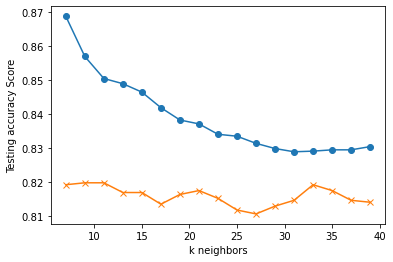

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(7, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(7, 40, 2), train_scores, marker='o')
plt.plot(range(7, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [13]:
# Note that k: 7 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=25 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=25 Test Acc: 0.817


In [ ]:
knn.fit(X_train)